In [75]:
!pip install keras
!pip install tensorflow
!pip install prophet
!pip install plotly

In [40]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [26]:
os.chdir("D:\\Data Daniel\\data")

In [41]:
df = pd.read_csv("BBRI.JK.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3327.215332,3327.215332,3327.215332,3327.215332,2594.003662,0
1,2019-01-02,3281.761475,3309.033691,3263.580078,3281.761475,2558.566650,82441033
2,2019-01-03,3254.489258,3309.033691,3254.489258,3290.852295,2565.654541,102805905
3,2019-01-04,3290.852295,3327.215332,3281.761475,3327.215332,2594.003662,125907734
4,2019-01-07,3363.578369,3372.668945,3327.215332,3327.215332,2594.003662,82106628


df.info()

In [ ]:
DATA PREPROCESSING
Time series data are collected at regular time interval, so we need to convert the date into datetime64. we dont need to sort the date because its already sorted by ascending

In [43]:
# CHANGE THE DATE FORMAT

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1349 non-null   datetime64[ns]
 1   Open       1349 non-null   float64       
 2   High       1349 non-null   float64       
 3   Low        1349 non-null   float64       
 4   Close      1349 non-null   float64       
 5   Adj Close  1349 non-null   float64       
 6   Volume     1349 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 73.9 KB


In [44]:
# SEE THE MISSING VALUES


df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [45]:
# SHOW THE VALUES FROM THE VOLUME THAT CONTAIN 0

df[df['Volume'] == 0]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3327.215332,3327.215332,3327.215332,3327.215332,2594.003662,0
25,2019-02-05,3545.393311,3545.393311,3545.393311,3545.393311,2764.102295,0
47,2019-03-07,3545.393311,3545.393311,3545.393311,3545.393311,2764.102295,0
66,2019-04-03,3772.662109,3772.662109,3772.662109,3772.662109,2941.288574,0
76,2019-04-17,3945.386475,3945.386475,3945.386475,3945.386475,3075.949707,0
78,2019-04-19,4054.475342,4054.475342,4054.475342,4054.475342,3160.999023,0
86,2019-05-01,3972.658691,3972.658691,3972.658691,3972.658691,3097.212158,0
107,2019-05-30,3581.756348,3581.756348,3581.756348,3581.756348,2891.727783,0
109,2019-06-03,3727.208252,3727.208252,3727.208252,3727.208252,3009.158447,0
110,2019-06-04,3727.208252,3727.208252,3727.208252,3727.208252,3009.158447,0


In [48]:
# show the date values min and max

print(df['Date'].min())
print(df['Date'].max())

2019-01-01
2024-07-09


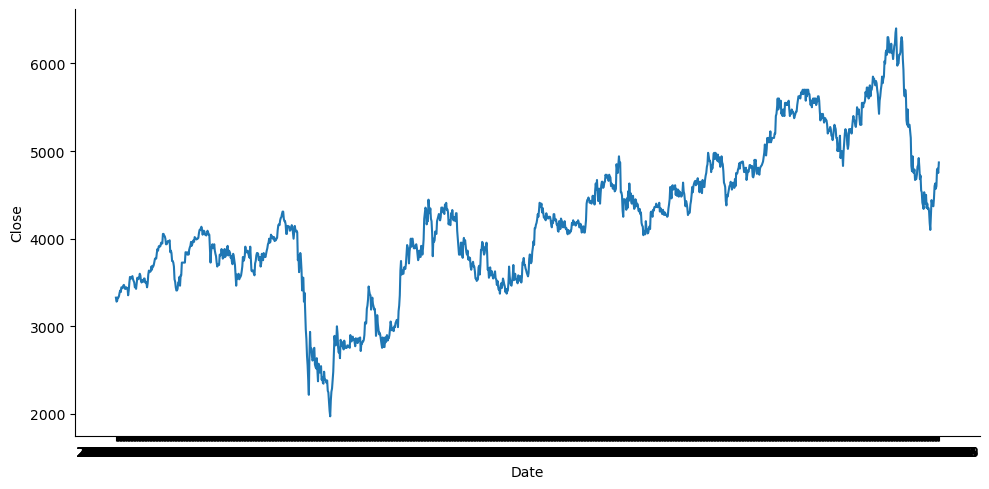

In [49]:
# data visualization

sns.relplot(x='Date', y='Close', data=df, kind='line', height=5, aspect=2)
plt.show()

# we use y as the close value because we want to predict the close value in the future

In [52]:
# fb prohphet implementation

from prophet import Prophet

In [53]:
daily_end = df[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})

daily_end.head()

,ds,y
0,2019-01-01,3327.215332
1,2019-01-02,3281.761475
2,2019-01-03,3290.852295
3,2019-01-04,3327.215332
4,2019-01-07,3327.215332


In [54]:
model = Prophet()
model.fit(daily_end)

23:06:59 - cmdstanpy - INFO - Chain [1] start processing
23:07:00 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
# forecasting 

future = model.make_future_dataframe(periods=365, freq='D')
future.tail()

,ds
1709,2025-07-05
1710,2025-07-06
1711,2025-07-07
1712,2025-07-08
1713,2025-07-09


In [56]:
forecast = model.predict(future)
forecast[['ds', 'trend', 'weekly', 'yearly', 'yhat']].tail()

,ds,trend,weekly,yearly,yhat
1709,2025-07-05,4926.356962,105.900188,-273.755799,4758.501351
1710,2025-07-06,4925.537353,105.900192,-266.630247,4764.807298
1711,2025-07-07,4924.717743,-47.754512,-258.632214,4618.331018
1712,2025-07-08,4923.898134,-42.517157,-249.911822,4631.469155
1713,2025-07-09,4923.078525,-42.760736,-240.629924,4639.687865


In [57]:
forecast['trend'] + forecast['weekly'] + forecast['yearly']

0       3249.858828
1       3262.558990
2       3277.829232
3       3293.023118
4       3320.965404
           ...     
1709    4758.501351
1710    4764.807298
1711    4618.331018
1712    4631.469155
1713    4639.687865
Length: 1714, dtype: float64

In [58]:
forecast['yhat']

0       3249.858828
1       3262.558990
2       3277.829232
3       3293.023118
4       3320.965404
           ...     
1709    4758.501351
1710    4764.807298
1711    4618.331018
1712    4631.469155
1713    4639.687865
Name: yhat, Length: 1714, dtype: float64

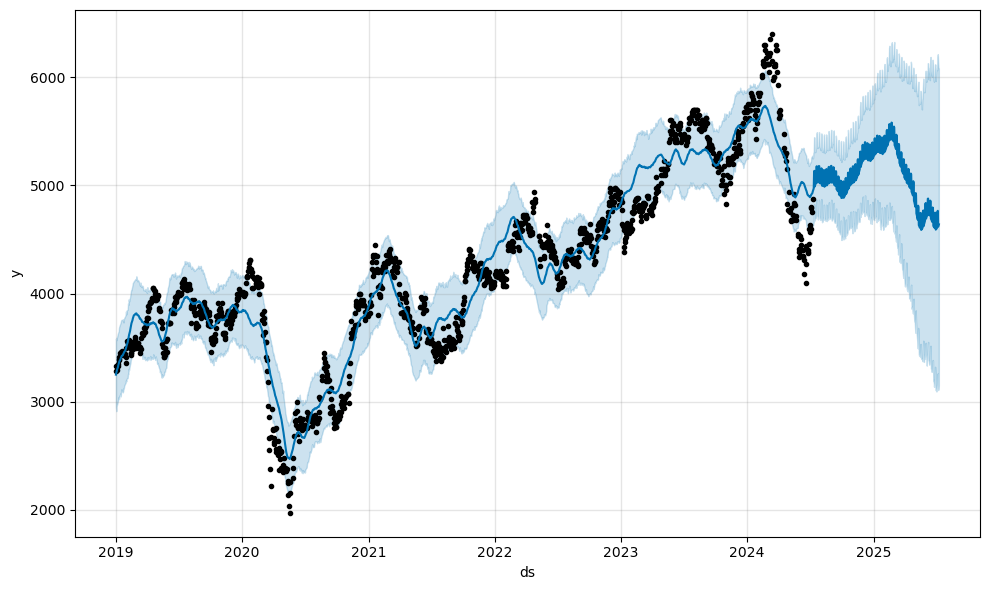

In [59]:
vis = model.plot(forecast)

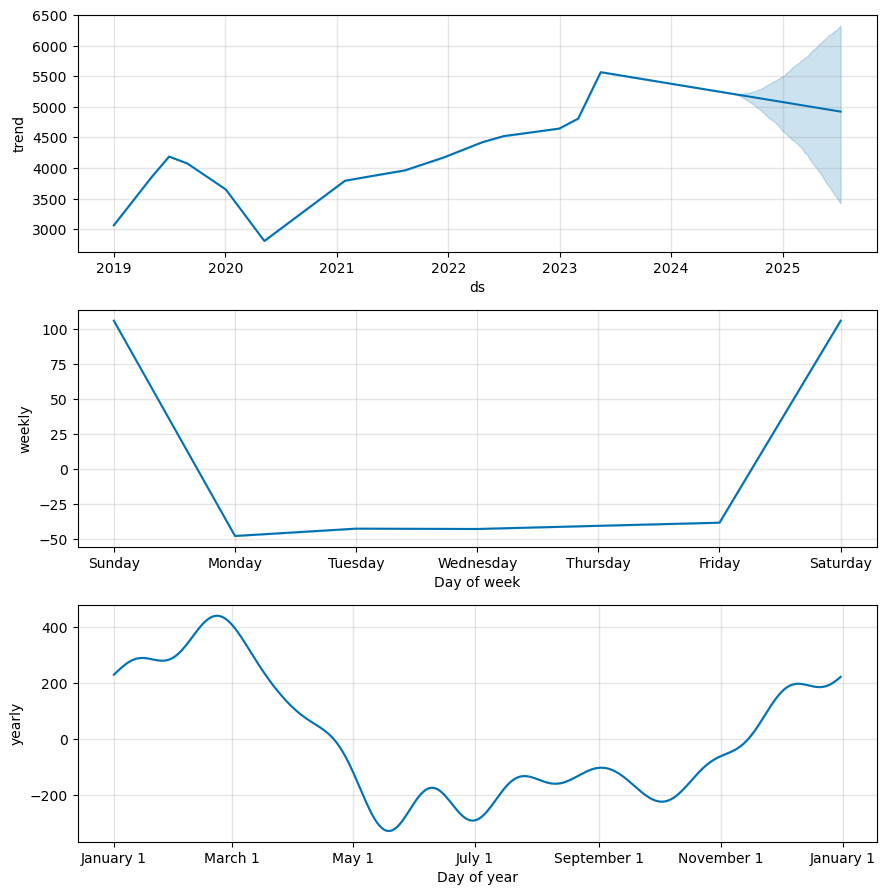

In [60]:
vis_2 = model.plot_components(forecast)

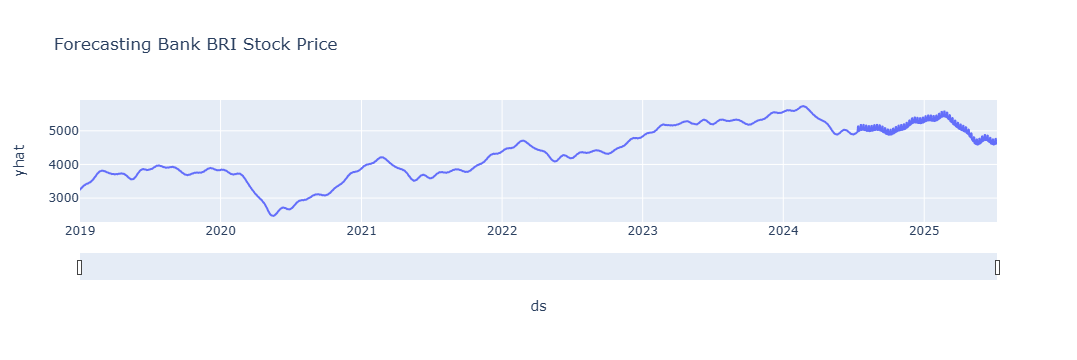

In [63]:
# some information about the forecast, interactive

import plotly.express as px

fig = px.line(forecast, x='ds', y='yhat', title='Forecasting Bank BRI Stock Price')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [79]:
import plotly.io as pio
pio.renderers.default = 'notebook'

23:32:41 - cmdstanpy - INFO - Chain [1] start processing
23:32:41 - cmdstanpy - INFO - Chain [1] done processing


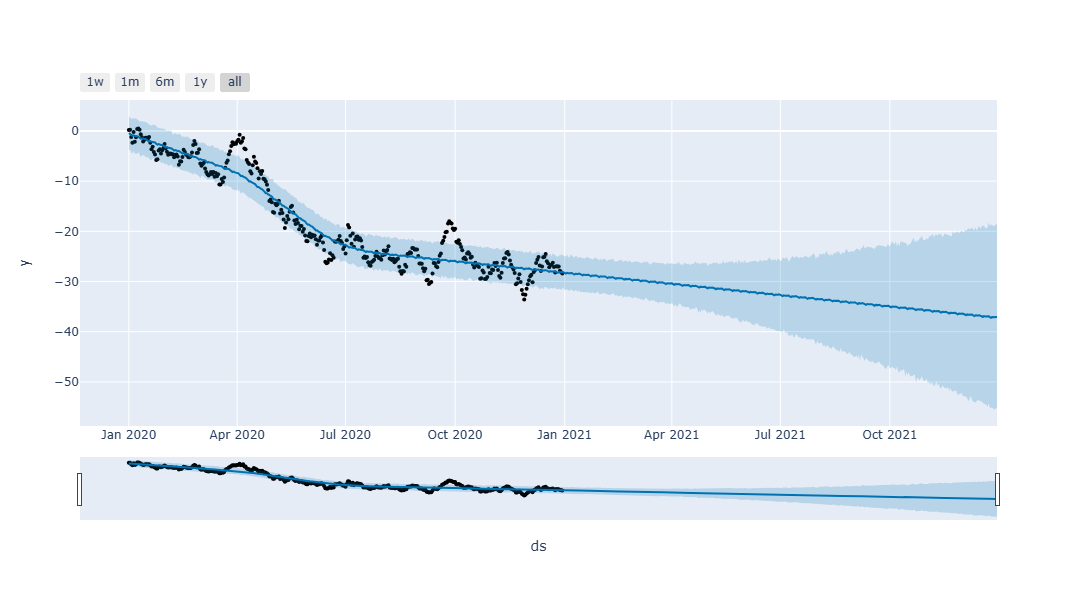

In [81]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py

py.init_notebook_mode(connected=True)

# Contoh sederhana
df = pd.DataFrame({
    'ds': pd.date_range(start='2020-01-01', periods=365, freq='D'),
    'y': np.random.randn(365).cumsum()
})

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

fig = plot_plotly(model, forecast)
py.iplot(fig)


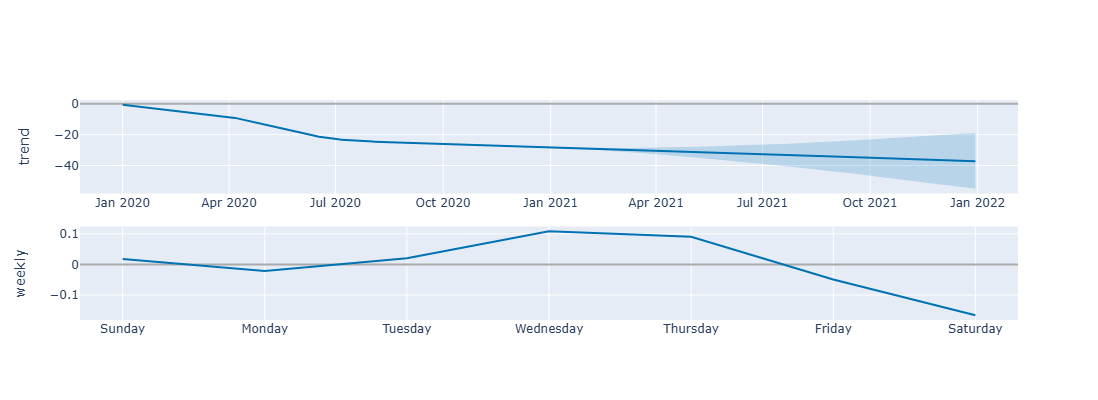

In [82]:
# visualiziation trend and seasonality (interactive)

plot_components_plotly(model, forecast)

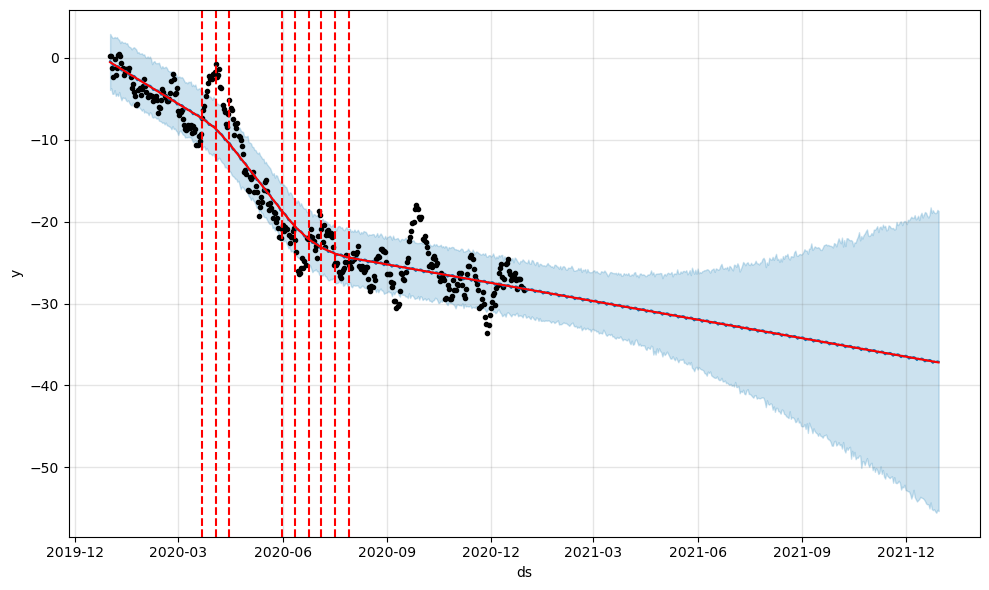

In [83]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

23:33:44 - cmdstanpy - INFO - Chain [1] start processing
23:33:44 - cmdstanpy - INFO - Chain [1] done processing


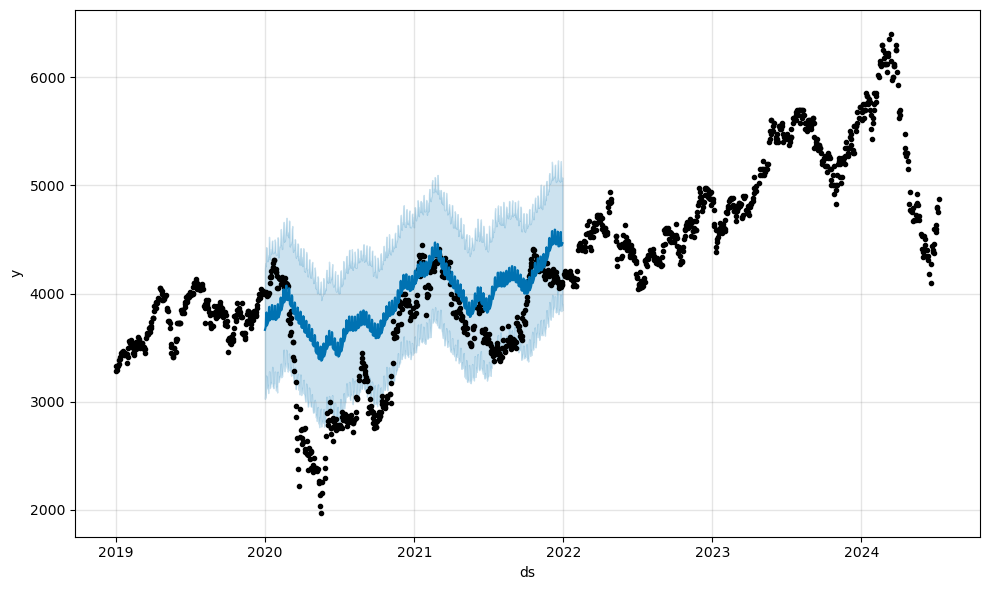

In [84]:
# making the changepoint prior scale smaller will make the trend less flexible
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(daily_end).predict(future)
fig = m.plot(forecast)

23:33:59 - cmdstanpy - INFO - Chain [1] start processing
23:34:00 - cmdstanpy - INFO - Chain [1] done processing


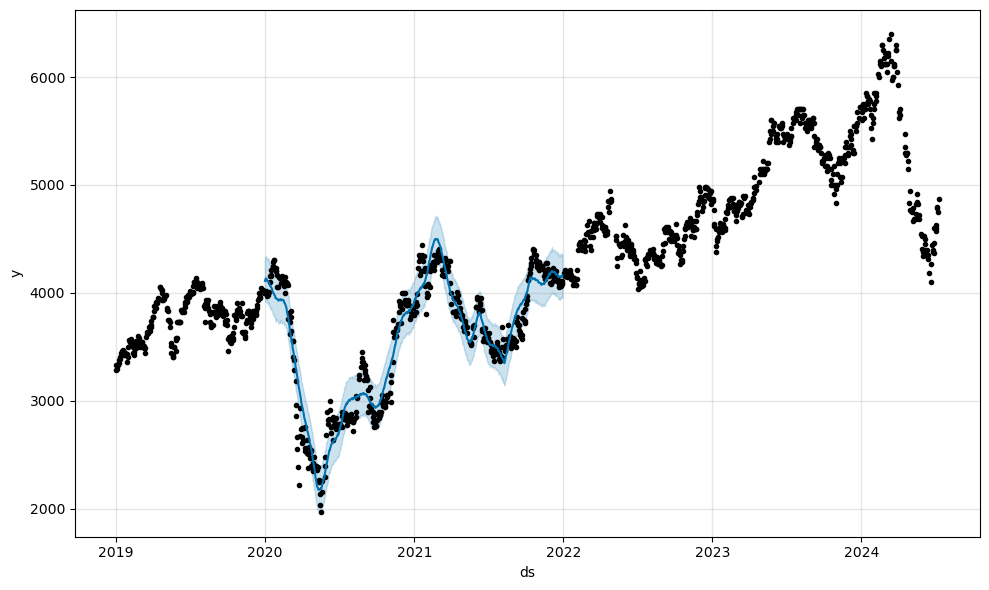

In [85]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(daily_end).predict(future)
fig = m.plot(forecast)

In [86]:
daily_end.head()

,ds,y
0,2019-01-01,3327.215332
1,2019-01-02,3281.761475
2,2019-01-03,3290.852295
3,2019-01-04,3327.215332
4,2019-01-07,3327.215332


In [88]:
# modelling holidays effect
# we want to see if the stock price is affected by the holidays

holidays = pd.DataFrame({
    'holiday': 'libur',
    'ds': pd.to_datetime(['2019-01-01', '2019-02-05', '2019-03-07', '2019-04-03', '2019-04-17', '2019-05-01', '2019-05-19', '2019-05-30', '2019-06-01', '2019-06-03', '2019-06-04', '2019-06-05', '2019-08-11', '2019-08-17', '2019-08-18', '2019-08-30', '2019-10-01', '2019-10-27', '2019-11-09', '2019-12-24', '2019-12-25', '2019-12-31', '2020-01-01', '2020-02-05', '2020-03-07', '2020-04-03', '2020-04-17', '2020-05-01', '2020-05-19', '2020-05-30', '2020-06-01', '2020-06-03', '2020-06-04', '2020-06-05', '2020-08-11', '2020-08-17', '2020-08-18', '2020-08-30', '2020-10-01', '2020-10-27', '2020-11-09', '2020-12-24', '2020-12-25', '2020-12-31', '2021-01-01', '2021-02-05', '2021-03-07', '2021-04-03', '2021-04-17', '2021-05-01', '2021-05-19', '2021-05-30', '2021-06-01', '2021-06-03', '2021-06-04', '2021-06-05', '2021-08-11', '2021-08-17', '2021-08-18', '2021-08-30', '2021-10-01', '2021-10-27', '2021-11-09', '2021-12-24', '2021-12-25', '2021-12-31', '2022-01-01', '2022-02-05', '2022-03-07', '2022-04-03', '2022-04-17', '2022-05-01', '2022-05-19', '2022-05-30', '2022-06-01', '2022-06-03', '2022-06-04', '2022-06-05', '2022-08-11', '2022-08-17', '2022-08-18', '2022-08-30', '2022-10-01', '2022-10-27', '2022-11-09', '2022-12-24', '2022-12-25', '2022-12-31', '2023-01-01', '2023-02-05', '2023-03-07', '2023-04-03', '2023-04-17', '2023-05-01', '2023-05-19', '2023-05-30', '2023-06-01', '2023-06-03', '2023-06-04', '2023-06-05', '2023-08-11', '2023-08-17', '2023-08-18', '2023-08-30', '2023-10-01', '2023-10-27', '2023-11-09', '2023-12-24', '2023-12-25', '2023-12-31', '2024-01-01', '2024-02-05', '2024-03-07', '2024-04-03', '2024-04-17', '2024-05-01', '2024-05-19', '2024-05-30', '2024-06-01', '2024-06-03', '2024-06-04', '2024-06-05', '2024-08-11', '2024-08-17', '2024-08-18', '2024-08-30', '2024-10-01', '2024-10-27', '2024-11-09', '2024-12-24', '2024-12-25', '2024-12-31'])
})

# Concatenate holidays dataframe with daily_end dataframe
daily_end = pd.concat([daily_end, holidays])

In [89]:
# check the holiday effect, 132 days are holiday from 2019 to 2024

daily_end[daily_end['holiday'] == 'libur']

,ds,y,holiday
0,2019-01-01 00:00:00,NaN,libur
1,2019-02-05 00:00:00,NaN,libur
2,2019-03-07 00:00:00,NaN,libur
3,2019-04-03 00:00:00,NaN,libur
4,2019-04-17 00:00:00,NaN,libur
...,...,...,...
127,2024-10-27 00:00:00,NaN,libur
128,2024-11-09 00:00:00,NaN,libur
129,2024-12-24 00:00:00,NaN,libur
130,2024-12-25 00:00:00,NaN,libur


In [90]:
# modelling holidays effect

model = Prophet(holidays=holidays) 
model.fit(daily_end)

23:35:56 - cmdstanpy - INFO - Chain [1] start processing
23:35:57 - cmdstanpy - INFO - Chain [1] done processing


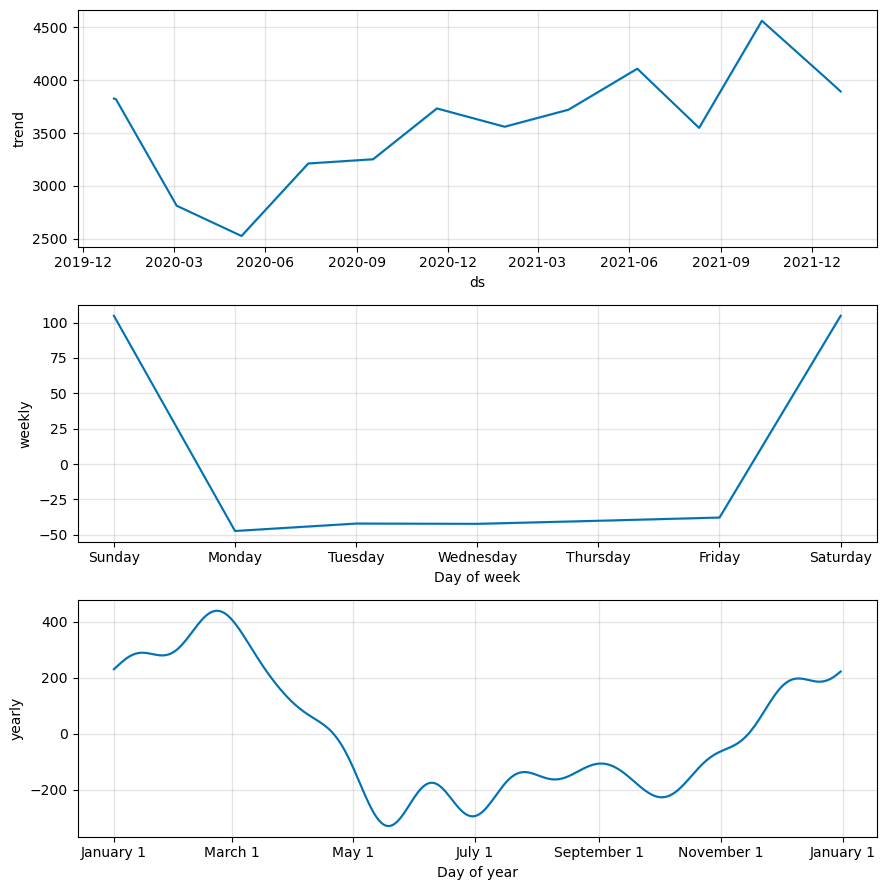

In [91]:
fig = model.plot_components(forecast)

In [92]:
 # built in country holidays effect

m = Prophet(holidays= holidays)
m.add_country_holidays(country_name='ID')
m.fit(daily_end)

23:36:29 - cmdstanpy - INFO - Chain [1] start processing
23:36:29 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
m.train_holiday_names

0                              libur
1                     New Year's Day
2                     Lunar New Year
3                     Day of Silence
4                        Good Friday
5                  Buddha's Birthday
6            International Labor Day
7                      Ascension Day
8                      Pancasila Day
9                   Independence Day
10                     Christmas Day
11                       Eid al-Fitr
12            Eid al-Fitr Second Day
13                       Eid al-Adha
14                  Islamic New Year
15                Prophet's Birthday
16                    Isra and Miraj
17                      Election Day
18    Prophet's Birthday (estimated)
19        Lunar New Year (estimated)
20     Buddha's Birthday (estimated)
21           Eid al-Adha (estimated)
22      Islamic New Year (estimated)
23        Isra and Miraj (estimated)
dtype: object

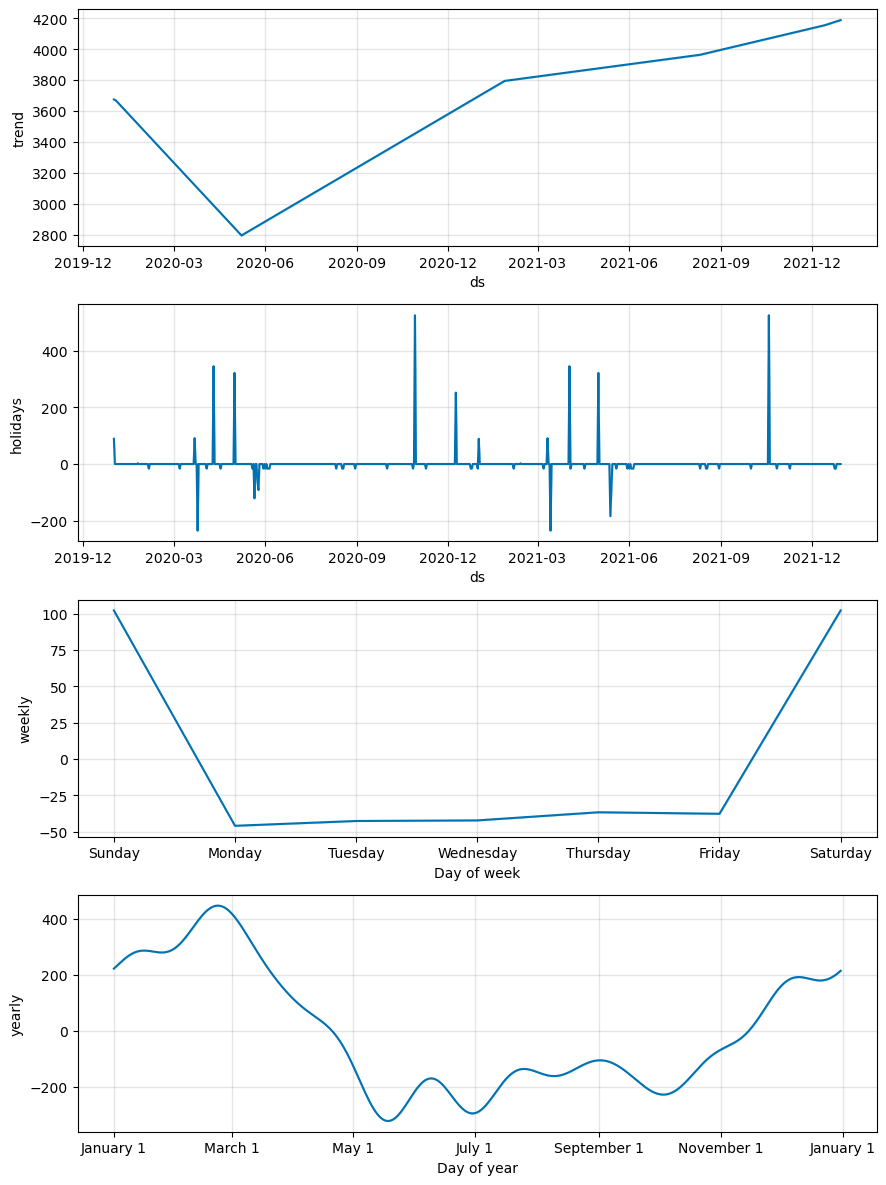

In [94]:
forecast = m.predict(future)
fig = m.plot_components(forecast)